In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h1>Data Wrangling

In [151]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv"

In [152]:
df = pd.read_csv(path)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


Identify and calculate the percentage of the missing values in each attribute

In [153]:
df.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [154]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [155]:
df['LaunchSite'].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [156]:
df['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [157]:
landing_outcome = df['Outcome'].value_counts()
landing_outcome

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

True Ocean means the mission outcome was successfully landed to a specific region of the ocean while False Ocean means the mission outcome was unsuccessfully landed to a specific region of the ocean. 

True RTLS means the mission outcome was successfully landed to a ground pad False RTLS means the mission outcome was unsuccessfully landed to a ground pad.

True ASDS means the mission outcome was successfully landed to a drone ship False ASDS means the mission outcome was unsuccessfully landed to a drone ship. 

None ASDS and None None these represent a failure to land.

In [158]:
for i, outcome in enumerate(landing_outcome.keys()):
    print(i, outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [159]:
bad_outcome = set(landing_outcome.keys()[[1,3,5,6,7]])
bad_outcome

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [160]:
landing_class = []
for i in df['Outcome']:
    if i in set(bad_outcome):
        landing_class.append(0)
    else:
        landing_class.append(1)


In [161]:
df['Class'] = landing_class
df['Class'].value_counts()

1    60
0    30
Name: Class, dtype: int64

In [162]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [163]:
df['Class'].mean()

0.6666666666666666

In [164]:
df.to_csv('dataset_part_2.csv', index=False)

<h1> EDA using SQL

In [165]:
import csv, sqlite3

In [166]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [167]:
con = sqlite3.connect('my_database_1.db')
cursor = con.cursor()

In [168]:
%sql sqlite:///my_database_1.db

In [169]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
data.to_sql('SPACEX', con, if_exists='replace', index=False, method='multi' )

101

In [170]:
%sql select * from SPACEX limit 5

 * sqlite:///my_database_1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [171]:
%sql create table SPACEXTABLE as select * from SPACEX where Date is not null

 * sqlite:///my_database_1.db
(sqlite3.OperationalError) table SPACEXTABLE already exists
[SQL: create table SPACEXTABLE as select * from SPACEX where Date is not null]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


Task 1
Display the names of the unique launch sites in the space mission

In [172]:
%sql select distinct(Launch_site) from SPACEX

 * sqlite:///my_database_1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


Task 2
Display 5 records where launch sites begin with the string 'CCA'

In [173]:
%%sql
select * 
from SPACEX
where Launch_site like '%CCA%'
limit 5

 * sqlite:///my_database_1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


Task 3
Display the total payload mass carried by boosters launched by NASA (CRS)
​

In [174]:
%%sql
select sum(PAYLOAD_MASS__KG_) as Total_Payload, Customer
from SPACEX
where Customer = 'NASA (CRS)'

 * sqlite:///my_database_1.db
Done.


Total_Payload,Customer
45596,NASA (CRS)


Task 4
Display average payload mass carried by booster version F9 v1.1

In [175]:
%%sql
select avg(PAYLOAD_MASS__KG_) as Total_Payload, Customer
from SPACEX
where Booster_Version = 'F9 v1.1'

 * sqlite:///my_database_1.db
Done.


Total_Payload,Customer
2928.4,SES


Task 5
List the date when the first succesful landing outcome in ground pad was acheived

In [176]:
%%sql
select Date, Landing_Outcome
from SPACEX
where Landing_Outcome = 'Success (ground pad)'
order by Date 
limit 1

 * sqlite:///my_database_1.db
Done.


Date,Landing_Outcome
2015-12-22,Success (ground pad)


Task 6
List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000

In [177]:
%%sql
select Booster_Version, Landing_Outcome, PAYLOAD_MASS__KG_
from SPACEX
where Landing_Outcome = 'Success (drone ship)' and
      PAYLOAD_MASS__KG_ between 4000 and 6000

 * sqlite:///my_database_1.db
Done.


Booster_Version,Landing_Outcome,PAYLOAD_MASS__KG_
F9 FT B1022,Success (drone ship),4696
F9 FT B1026,Success (drone ship),4600
F9 FT B1021.2,Success (drone ship),5300
F9 FT B1031.2,Success (drone ship),5200


Task 7
List the total number of successful and failure mission outcomes

In [178]:
%%sql
select Mission_Outcome,count(*) as Total_number
from SPACEX
group by Mission_Outcome

 * sqlite:///my_database_1.db
Done.


Mission_Outcome,Total_number
Failure (in flight),1
Success,98
Success,1
Success (payload status unclear),1


Task 8
List the names of the booster_versions which have carried the maximum payload mass. Use a subquery

In [179]:
%%sql 
SELECT Booster_Version,PAYLOAD_MASS__KG_ 
FROM SPACEX 
WHERE PAYLOAD_MASS__KG_ = (SELECT MAX(PAYLOAD_MASS__KG_) FROM SPACEX)

 * sqlite:///my_database_1.db
Done.


Booster_Version,PAYLOAD_MASS__KG_
F9 B5 B1048.4,15600
F9 B5 B1049.4,15600
F9 B5 B1051.3,15600
F9 B5 B1056.4,15600
F9 B5 B1048.5,15600
F9 B5 B1051.4,15600
F9 B5 B1049.5,15600
F9 B5 B1060.2,15600
F9 B5 B1058.3,15600
F9 B5 B1051.6,15600


Task 9

List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.

Note: SQLLite does not support monthnames. So you need to use substr(Date, 6,2) as month to get the months and substr(Date,0,5)='2015' for year.

In [180]:
%%sql
select substr(Date,6,2) as Month, 
       Landing_outcome, 
       Booster_Version, 
       Launch_site, 
       substr(Date,0,5) as Year
from SPACEX
where Landing_outcome = 'Failure (drone ship)' and
      substr(Date,0,5) = '2015'

 * sqlite:///my_database_1.db
Done.


Month,Landing_Outcome,Booster_Version,Launch_Site,Year
01,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40,2015
04,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40,2015


Task 10

Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.
​

In [181]:
%%sql 
select Landing_outcome,count(*) as Quantity, Date
from SPACEX
where Date between '2010-06-04' and '2017-03-20'
group by Landing_outcome
order by Quantity desc

 * sqlite:///my_database_1.db
Done.


Landing_Outcome,Quantity,Date
No attempt,10,2012-05-22
Success (drone ship),5,2016-04-08
Failure (drone ship),5,2015-01-10
Success (ground pad),3,2015-12-22
Controlled (ocean),3,2014-04-18
Uncontrolled (ocean),2,2013-09-29
Failure (parachute),2,2010-06-04
Precluded (drone ship),1,2015-06-28


<h1> EDA using pandas and Matplotlib

In [182]:
import seaborn as sns

In [183]:
df_2 = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv')

In [184]:
df_2.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


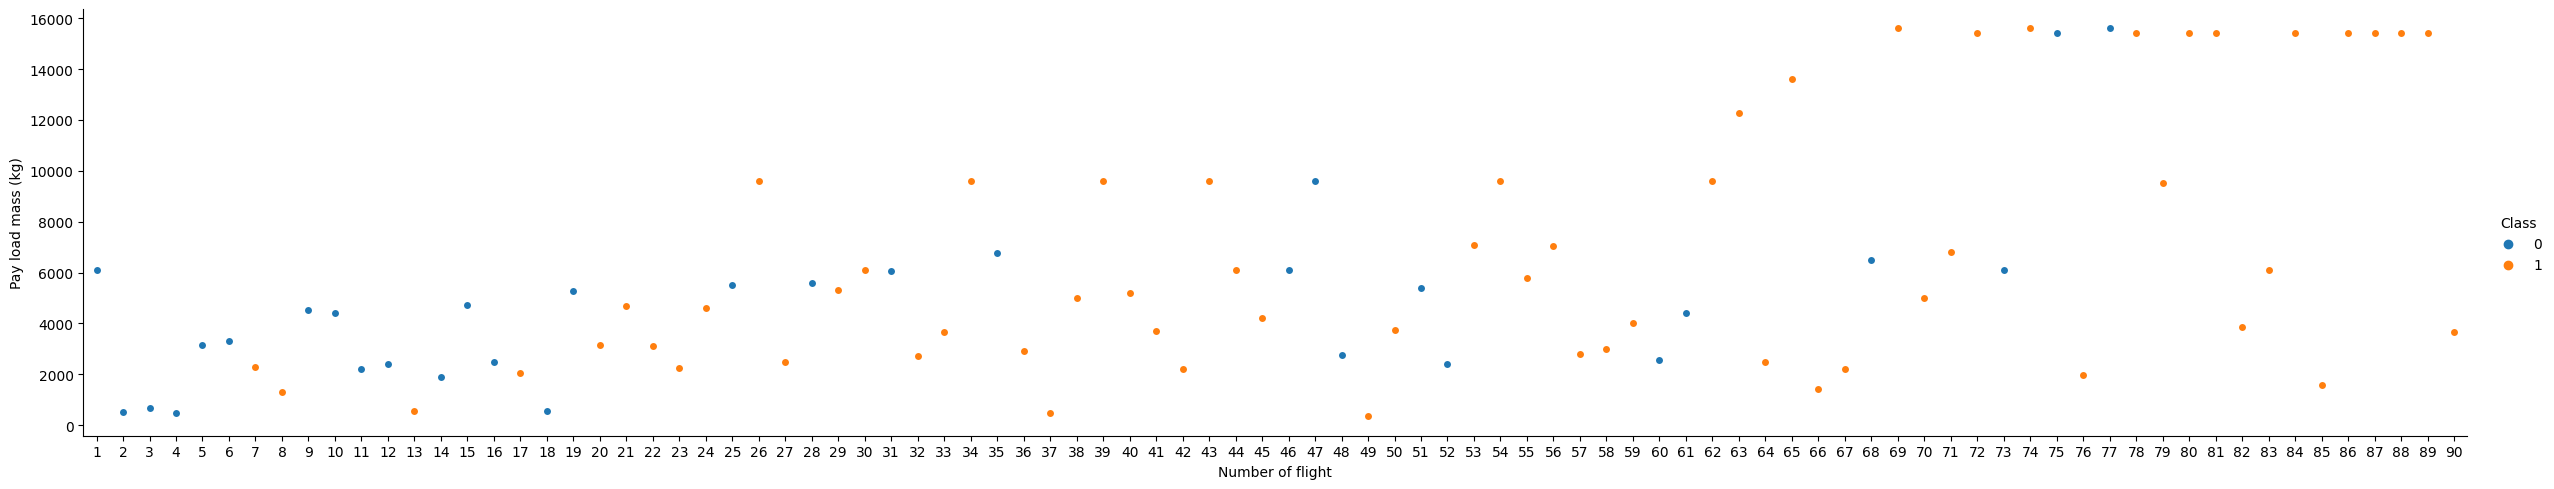

In [185]:
sns.catplot(y='PayloadMass', x='FlightNumber', hue='Class', data = df_2, aspect=5)
plt.xlabel('Number of flight')
plt.ylabel('Pay load mass (kg)')
plt.show()

### TASK 1: Visualize the relationship between Flight Number and Launch Site

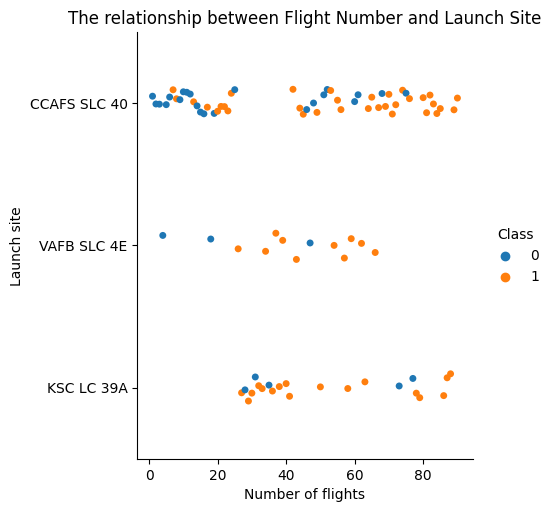

In [186]:
fig = sns.catplot(y='LaunchSite',x='FlightNumber',data=df_2, hue='Class')
plt.xlabel('Number of flights')
plt.ylabel('Launch site'),
plt.title('The relationship between Flight Number and Launch Site')
plt.show()

CCAFS took lower percentages of successful landings compared to VAFB and KSC. But CCAFS was more chosen than the others. The first 20 experiment flights into space was launched by CCAFS. 

### TASK 2: Visualize the relationship between Payload and Launch Site

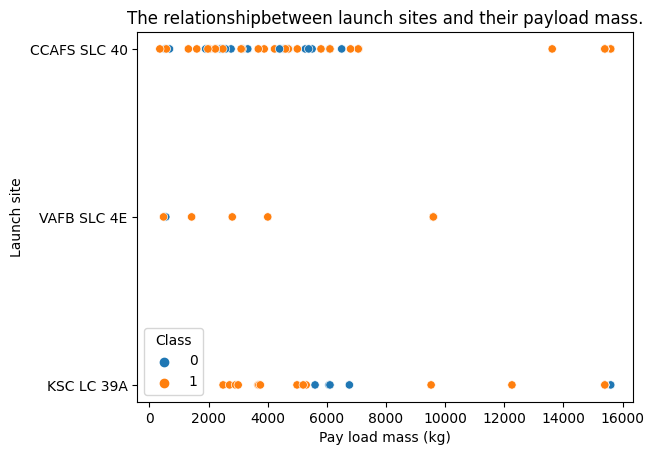

In [187]:
sns.scatterplot(data=df_2,x='PayloadMass', y='LaunchSite', hue='Class')
plt.xlabel('Pay load mass (kg)')
plt.ylabel('Launch site'),
plt.title('The relationshipbetween launch sites and their payload mass.')
plt.show()

### TASK  3: Visualize the relationship between success rate of each orbit type


In [188]:
success_rate_orbit = df_2.groupby('Orbit')['Class'].mean().reset_index()
success_rate_orbit

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


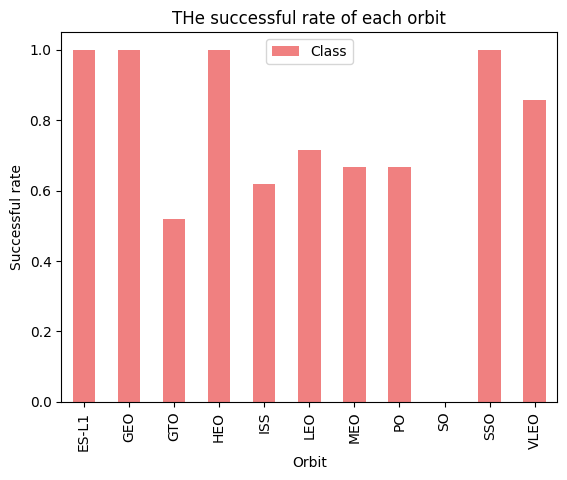

In [189]:
success_rate_orbit.plot(kind='bar',x='Orbit',y='Class', color='lightcoral')
plt.xlabel('Orbit')
plt.ylabel('Successful rate'),
plt.title('THe successful rate of each orbit')
plt.show()

### TASK  4: Visualize the relationship between FlightNumber and Orbit type

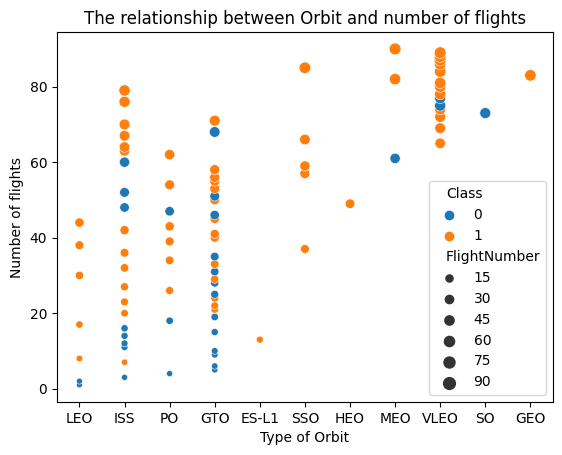

In [190]:
sns.scatterplot(data=df_2,x='Orbit', y='FlightNumber', hue='Class', size='FlightNumber')
plt.xlabel('Type of Orbit')
plt.ylabel('Number of flights'),
plt.title('The relationship between Orbit and number of flights')
plt.show()

### TASK  5: Visualize the relationship between Payload and Orbit type

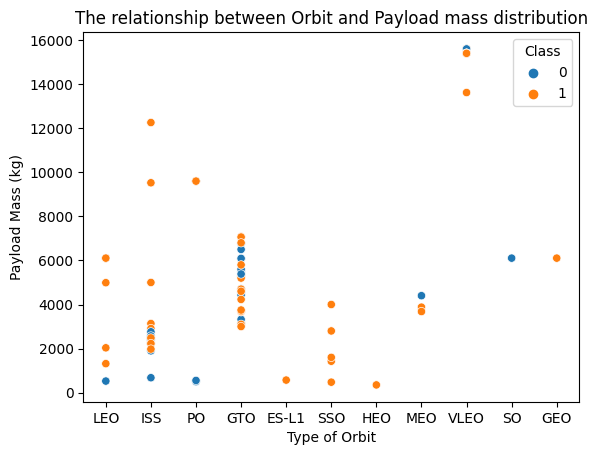

In [191]:
sns.scatterplot(data=df_2,x='Orbit', y='PayloadMass', hue='Class')
plt.xlabel('Type of Orbit')
plt.ylabel('Payload Mass (kg)'),
plt.title('The relationship between Orbit and Payload mass distribution')
plt.show()

### TASK  6: Visualize the launch success yearly trend

In [192]:
year = []
def Extract_year():
    for i in df_2['Date']:
        year.append(i.split('-')[0])
    return year
Extract_year()
df_2['Date'] = year
df_2.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


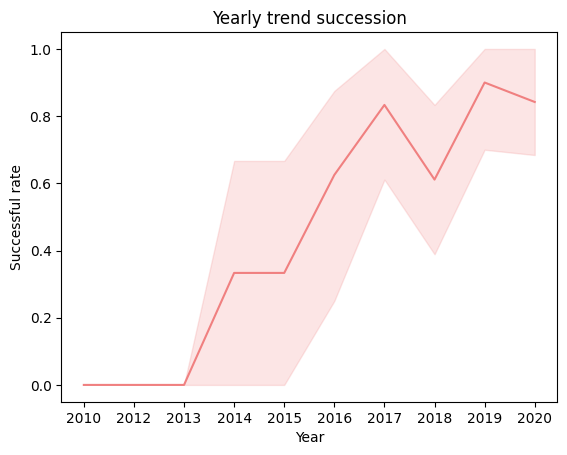

In [193]:
sns.lineplot(data=df_2, x='Date',y='Class', color='lightcoral')
plt.xlabel('Year')
plt.ylabel('Successful rate'),
plt.title('Yearly trend succession')
plt.show()

## Features Engineering


In [194]:
features = df_2[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [195]:
features_one_hot = pd.get_dummies(features, columns=['Orbit','LaunchSite','LandingPad','Serial'])

In [196]:
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
features_one_hot = features_one_hot.astype(float)

In [198]:
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

In [199]:
#features_one_hot.to_csv('dataset_part_3.csv', index=False)